# Build a simple neural network
Training by MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [ ]:
# 1. Dataset
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

In [3]:
# Define the nn model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128) # input -> hidden
        self.fc2 = nn.Linear(128, 64) 
        self.fc3 = nn.Linear(64, 10) # hidden -> output
    def forward(self, X):
        X = X.view(-1, 28 * 28) # Flatten
        X = torch.relu(self.fc1(X))
        X = torch.relu(self.fc2(X))
        X = self.fc3(X) # logits
        return X
model = NeuralNetwork()

In [4]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() # Good for classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Todo:
- Why these inputs and outputs?
- Why the order in the forward function?


In [5]:
# Training loop
for epoch in range(1):  # just 1 epoch for demo
    for images, labels in trainloader:
        outputs = model(images)          # forward pass
        loss = criterion(outputs, labels) 

        optimizer.zero_grad()            # reset gradients
        loss.backward()                  # backward pass
        optimizer.step()                 # update weights
        # if epoch % 10 == 0 or epoch == 99:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 2.3318
Epoch 1, Loss: 2.2863
Epoch 1, Loss: 2.3351
Epoch 1, Loss: 2.3228
Epoch 1, Loss: 2.3030
Epoch 1, Loss: 2.3016
Epoch 1, Loss: 2.3125
Epoch 1, Loss: 2.3104
Epoch 1, Loss: 2.2722
Epoch 1, Loss: 2.2940
Epoch 1, Loss: 2.3057
Epoch 1, Loss: 2.3312
Epoch 1, Loss: 2.3074
Epoch 1, Loss: 2.3089
Epoch 1, Loss: 2.3136
Epoch 1, Loss: 2.3123
Epoch 1, Loss: 2.3026
Epoch 1, Loss: 2.3154
Epoch 1, Loss: 2.2900
Epoch 1, Loss: 2.3004
Epoch 1, Loss: 2.3185
Epoch 1, Loss: 2.2952
Epoch 1, Loss: 2.2765
Epoch 1, Loss: 2.3053
Epoch 1, Loss: 2.3142
Epoch 1, Loss: 2.3013
Epoch 1, Loss: 2.3040
Epoch 1, Loss: 2.3030
Epoch 1, Loss: 2.2953
Epoch 1, Loss: 2.3018
Epoch 1, Loss: 2.3013
Epoch 1, Loss: 2.2791
Epoch 1, Loss: 2.2743
Epoch 1, Loss: 2.2916
Epoch 1, Loss: 2.2853
Epoch 1, Loss: 2.2908
Epoch 1, Loss: 2.2881
Epoch 1, Loss: 2.2958
Epoch 1, Loss: 2.2785
Epoch 1, Loss: 2.2731
Epoch 1, Loss: 2.3162
Epoch 1, Loss: 2.2717
Epoch 1, Loss: 2.3106
Epoch 1, Loss: 2.2770
Epoch 1, Loss: 2.2917
Epoch 1, L

In [6]:
# Testing accuracy
correct, total = 0, 0
with torch.no_grad():  # no gradient needed
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # pick class with max score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 80.02%


Image n-th:  221
Predicted: 2


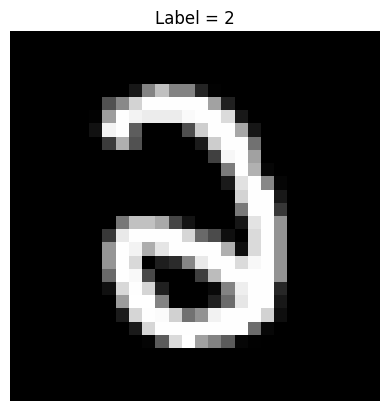

In [68]:
# Use the model to predict some random data
import matplotlib.pyplot as plt
random_idx = torch.randint(0,1000,(1,1)).item()
print("Image n-th: ",random_idx)
img, label = testset[random_idx]
plt.imshow(img.permute(1,2,0), cmap='gray')
plt.axis('off')
plt.title(f"Label = {label}")

# Predicted
predicted = model(img)
# print(predicted)
predicted_label = torch.max(predicted,1)[1].item()
print(f"Predicted: {predicted_label}")